<img src="syed-bilal-javaid-uc9GjDHj1yA-unsplash.jpg" style="height:300px;width:100%" />
<h1 style="font-size:40px;text-align:center;border:1px solid">Pakistan TimeSeries Analysis</h1>
<p>In this Notebook we are going some Various <b>Models</b> to predict the Forecast</p>
<p>We Will Use the LSTM model from RNN to create our Forecast</p>
<p>We will will be using the Pakistan Economy Datasets which Consist of the Features Such as <b>GDP,CPI,Unemployement Rate</b></p>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
sns.set_style('whitegrid')
import datetime
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('Pakistan economic and unemployment data cleaned.csv')
data.head()

,Year,Country Name,Country Code,CPI Value,GDP value,Unemployment rate,Indicator Name_CPI,Indicator Name_GDP,Indicator Name
0,1991,Pakistan,PAK,11.791270,5.061568,0.59,"Inflation, consumer prices (annual %)",GDP growth(annual %),"Unemployment, total (% of total labor force) (..."
1,1992,Pakistan,PAK,9.509041,7.705898,0.60,"Inflation, consumer prices (annual %)",GDP growth(annual %),"Unemployment, total (% of total labor force) (..."
2,1993,Pakistan,PAK,9.973665,1.757748,0.62,"Inflation, consumer prices (annual %)",GDP growth(annual %),"Unemployment, total (% of total labor force) (..."
3,1994,Pakistan,PAK,12.368194,3.737416,0.63,"Inflation, consumer prices (annual %)",GDP growth(annual %),"Unemployment, total (% of total labor force) (..."
4,1995,Pakistan,PAK,12.343579,4.962609,0.63,"Inflation, consumer prices (annual %)",GDP growth(annual %),"Unemployment, total (% of total labor force) (..."


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                30 non-null     int64  
 1   Country Name        30 non-null     object 
 2   Country Code        30 non-null     object 
 3   CPI Value           30 non-null     float64
 4   GDP value           30 non-null     float64
 5   Unemployment rate   30 non-null     float64
 6   Indicator Name_CPI  30 non-null     object 
 7   Indicator Name_GDP  30 non-null     object 
 8   Indicator Name      30 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.2+ KB


In [26]:
newdata = []
for values in data.columns:
    if data[str(values)].dtypes != 'object':
        newdata.append(data[str(values)])

In [27]:
df = pd.DataFrame(newdata)
df = df.transpose()
df['Year'] = df['Year'].astype('int64')
df['Year'] = pd.to_datetime(df['Year'],format='%Y')
df = df.copy()
df.head()

,Year,CPI Value,GDP value,Unemployment rate
0,1991-01-01,11.791270,5.061568,0.59
1,1992-01-01,9.509041,7.705898,0.60
2,1993-01-01,9.973665,1.757748,0.62
3,1994-01-01,12.368194,3.737416,0.63
4,1995-01-01,12.343579,4.962609,0.63


In [28]:
df.isnull().sum()

Year                 0
CPI Value            0
GDP value            0
Unemployment rate    0
dtype: int64

In [29]:
df.describe()

,CPI Value,GDP value,Unemployment rate
count,30.000000,30.000000,30.000000
mean,8.432726,4.027440,1.441667
std,4.076319,1.913416,1.403825
min,2.529328,0.525527,0.400000
25%,4.544513,2.599777,0.622500
50%,8.492206,4.328272,0.630000
75%,11.176210,5.410444,1.797500
max,20.286121,7.705898,4.650000


<h1 style="font-family:Arial;font-size:40px;border: 1px solid;text-align:center">Data Visualizations </h1>

<h1>Visualizing the CPI data</h1>
   

In [30]:
cpi_data = df[['Year','CPI Value']]
cpi_data.set_index('Year',inplace=True)
cpi_data.head()

,CPI Value
Year,
1991-01-01,11.791270
1992-01-01,9.509041
1993-01-01,9.973665
1994-01-01,12.368194
1995-01-01,12.343579


<Figure size 720x432 with 0 Axes>

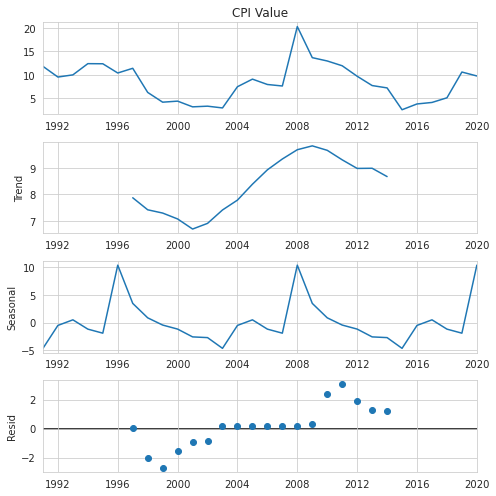

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize']  = (7,7)
fig = plt.figure(figsize=(10,6))
decomposition =  seasonal_decompose(cpi_data['CPI Value'],period=12)
fig = decomposition.plot()
plt.show()

<h1>Visualizing the GDP data</h1>

<Figure size 864x432 with 0 Axes>

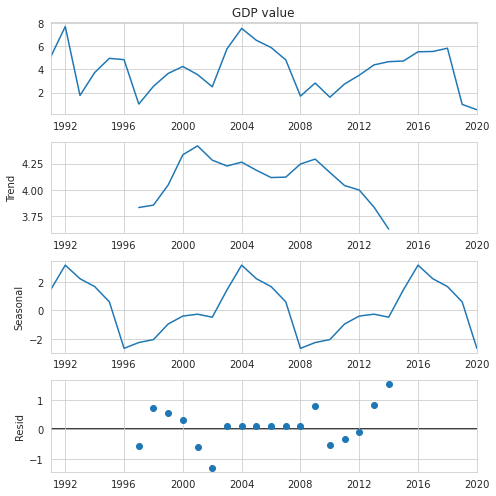

In [32]:
gdp_data = df[['Year','GDP value']]
gdp_data.set_index('Year',inplace=True)
decompose1 = seasonal_decompose(gdp_data['GDP value'],period=12)
fig = plt.figure(figsize=(12,6))
fig = decompose1.plot()
plt.show()

<h1>Visualizing the Unemployment Rate data</h1>

<Figure size 864x432 with 0 Axes>

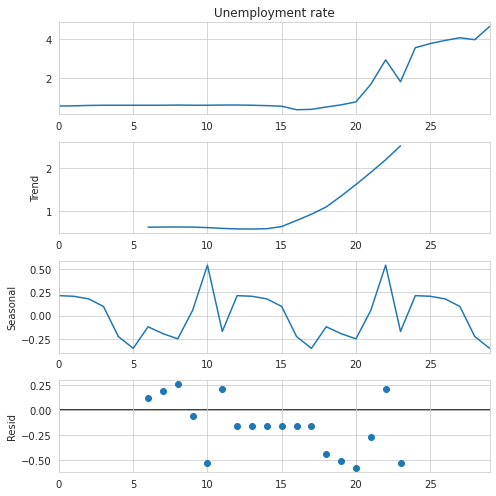

In [33]:
unemp_data = df[['Year','Unemployment rate']]
unemp_data.set_index('Year',inplace=True)
decompose1 = seasonal_decompose(df['Unemployment rate'],period=12)
fig = plt.figure(figsize=(12,6))
fig = decompose1.plot()
plt.show()

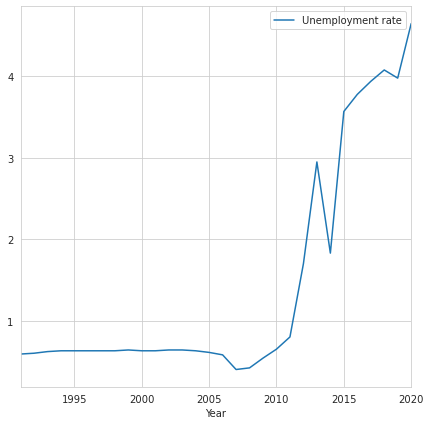

In [34]:
unemp_data.plot()

In [35]:
#testing the stationarity of our data
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(cpi_data['CPI Value'])
test_result

(-4.310407898517494,
 0.00042613436720303187,
 6,
 23,
 {'1%': -3.7529275211638033,
  '5%': -2.998499866852963,
  '10%': -2.6389669754253307},
 107.10098390935947)

## Checking the Stationarity of the Data

In [36]:
def adfuller_test(indicator):
    result =adfuller(indicator)
    labels =  ['ADF Test Statistic','p_value','#Lags Used','Number of Observations Used']
    for value,label in zip (result,labels):
        print(label+':'+str(value))
    if result[1] <= 0.05:
        print('strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary')
    else:
         print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

### Checking Stationarity for CPI Data

In [37]:
adfuller_test(cpi_data['CPI Value'])

ADF Test Statistic:-4.310407898517494
p_value:0.00042613436720303187
#Lags Used:6
Number of Observations Used:23
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Checking Stationarity for GDP Data

In [38]:
adfuller_test(gdp_data['GDP value'])

ADF Test Statistic:-3.3469658661950543
p_value:0.012905257136244352
#Lags Used:1
Number of Observations Used:28
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Checking Stationarity for Unemployment Rate Data

In [39]:
adfuller_test(unemp_data['Unemployment rate'])

ADF Test Statistic:-1.8661427207084156
p_value:0.3481523595425634
#Lags Used:9
Number of Observations Used:20
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


- From the Various Observations Shown above we can see that the Unemployement Rate Data is not <b>Stationary</b> since it shows that there is weak evidence against the null hypothesis
- But We can see for the <b>GDP,CPI</b> the data shows stationarity after adfuller testing 

# Differencing 

In [40]:
df['Unemployment First Difference'] =df['Unemployment rate'] - df['Unemployment rate'].shift(1)

In [41]:
df['Unemployment Second Difference'] =df['Unemployment First Difference'] - df['Unemployment First Difference'].shift(10)

In [42]:
df.head()

,Year,CPI Value,GDP value,Unemployment rate,Unemployment First Difference,Unemployment Second Difference
0,1991-01-01,11.791270,5.061568,0.59,NaN,NaN
1,1992-01-01,9.509041,7.705898,0.60,0.01,NaN
2,1993-01-01,9.973665,1.757748,0.62,0.02,NaN
3,1994-01-01,12.368194,3.737416,0.63,0.01,NaN
4,1995-01-01,12.343579,4.962609,0.63,0.00,NaN


In [43]:
adfuller_test(df['Unemployment First Difference'].dropna())

ADF Test Statistic:-1.4447140232292994
p_value:0.5606620229712113
#Lags Used:9
Number of Observations Used:19
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [44]:
adfuller_test(df['Unemployment Second Difference'].dropna())

ADF Test Statistic:-5.915047004386009
p_value:2.5846723808860515e-07
#Lags Used:0
Number of Observations Used:18
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Auto Regressive Model

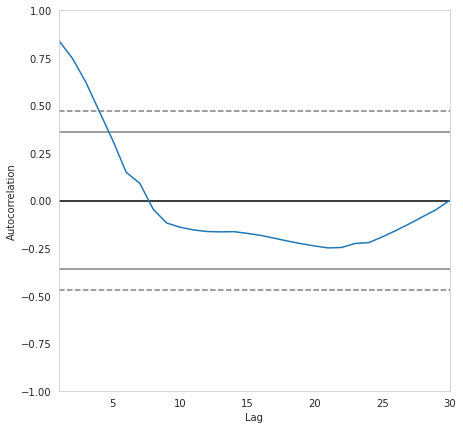

In [45]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(unemp_data['Unemployment rate'])
plt.show()

# Partial AutoCorrelation & AutoCorrelation for CPI data

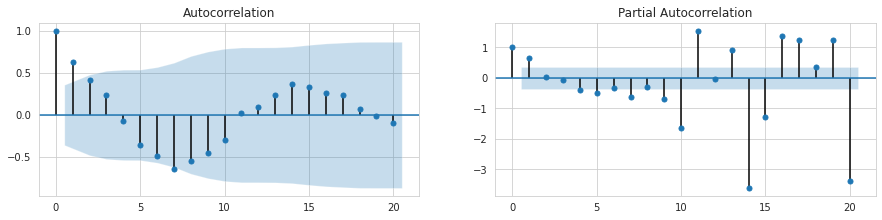

In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(221)
fig =  plot_acf(cpi_data['CPI Value'],lags=20,ax=ax1)
ax2 = fig.add_subplot(222)
fig = plot_pacf(cpi_data['CPI Value'],lags=20,ax=ax2)

# Partial AutoCorrelation & AutoCorrelation for GDP data

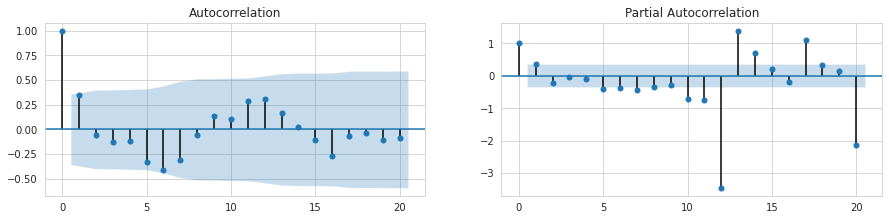

In [47]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(221)
fig =  plot_acf(gdp_data['GDP value'],lags=20,ax=ax1)
ax2 = fig.add_subplot(222)
fig = plot_pacf(gdp_data['GDP value'],lags=20,ax=ax2)

# Creating forecast for CPI data

In [96]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(cpi_data['CPI Value'],order=(1,0,1))
results =  model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              CPI Value   No. Observations:                   30
Model:                     ARMA(1, 1)   Log Likelihood                 -76.608
Method:                       css-mle   S.D. of innovations              3.084
Date:                Tue, 16 Nov 2021   AIC                            161.216
Time:                        17:56:29   BIC                            166.821
Sample:                    01-01-1991   HQIC                           163.009
                         - 01-01-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.6816      1.469      5.910      0.000       5.802      11.561
ar.L1.CPI Value     0.6506      0.193      3.366      0.001       0.272       1.030
ma.L1.CPI Value    -0.0405      0.243     -0.167      0.868      -0.517       0.436
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5370           +0.0000j            1.5370            0.0000
MA.1           24.7083           +0.0000j           24.7083            0.0000
-----------------------------------------------------------------------------
"""

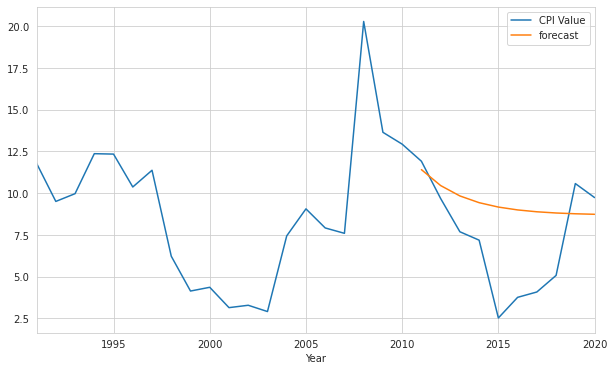

In [97]:
cpi_data['forecast'] = results.predict(start=20,end=30,dynamic=True)
cpi_data[['CPI Value','forecast']].plot(figsize=(10,6))

In [98]:
from pandas.tseries.offsets import DateOffset
future_dates = [cpi_data.index[-1]+DateOffset(years=x)for x in range(1,10)]

In [99]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns = cpi_data.columns)

In [100]:
future_dates_df.tail()

,CPI Value,forecast
2025-01-01,NaN,NaN
2026-01-01,NaN,NaN
2027-01-01,NaN,NaN
2028-01-01,NaN,NaN
2029-01-01,NaN,NaN


In [101]:
future_df = pd.concat([cpi_data,future_dates_df])

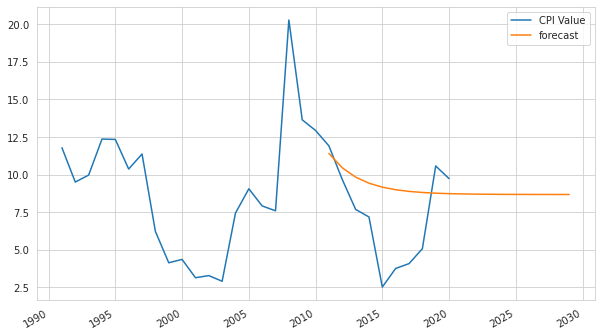

In [102]:
future_df['forecast'] = results.predict(start = 20, end = 40, dynamic= True)  
future_df[['CPI Value', 'forecast']].plot(figsize=(10, 6))

In [103]:
cpi_data.tail(15)

,CPI Value,forecast
Year,,
2006-01-01,7.921084,NaN
2007-01-01,7.598684,NaN
2008-01-01,20.286121,NaN
2009-01-01,13.647765,NaN
2010-01-01,12.938871,NaN
2011-01-01,11.916093,11.413367
2012-01-01,9.682352,10.458948
2013-01-01,7.692156,9.837977
2014-01-01,7.189384,9.433957


In [104]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(cpi_data['CPI Value'].iloc[:10],cpi_data['forecast'].dropna()))
print(rmse)

2.739135159092897


# Creating Forecast for GDP data

In [55]:
model1 =ARIMA(gdp_data['GDP value'],order=(10,0,1))
results1 =  model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              GDP value   No. Observations:                   30
Model:                    ARMA(10, 1)   Log Likelihood                 -51.245
Method:                       css-mle   S.D. of innovations              1.230
Date:                Mon, 15 Nov 2021   AIC                            128.490
Time:                        22:51:26   BIC                            146.706
Sample:                    01-01-1991   HQIC                           134.317
                         - 01-01-2020                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.0208      0.102     39.365      0.000       3.821       4.221
ar.L1.GDP value     -0.3200      0.327     -0.977      0.328      -0.962       0.322
ar.L2.GDP value     -0.1698      0.220     -0.773      0.439      -0.600       0.261
ar.L3.GDP value     -0.5012      0.223     -2.251      0.024      -0.938      -0.065
ar.L4.GDP value     -0.1093      0.213     -0.514      0.607      -0.526       0.307
ar.L5.GDP value     -0.4251      0.204     -2.080      0.037      -0.826      -0.025
ar.L6.GDP value     -0.4138      0.217     -1.911      0.056      -0.838       0.011
ar.L7.GDP value     -0.4974      0.209     -2.378      0.017      -0.907      -0.087
ar.L8.GDP value     -0.2671      0.230     -1.163      0.245      -0.717       0.183
ar.L9.GDP value      0.0089      0.220      0.040      0.968      -0.422       0.439
ar.L10.GDP value    -0.3746      0.211     -1.772      0.076      -0.789       0.040
ma.L1.GDP value      0.5808      0.353      1.647      0.099      -0.110       1.272
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0127           -0.2175j            1.0358           -0.4663
AR.2            -1.0127           +0.2175j            1.0358            0.4663
AR.3            -0.6396           -0.9046j            1.1079           -0.3480
AR.4            -0.6396           +0.9046j            1.1079            0.3480
AR.5             0.0666           -1.0561j            1.0582           -0.2400
AR.6             0.0666           +1.0561j            1.0582            0.2400
AR.7             0.8893           -0.5387j            1.0397           -0.0867
AR.8             0.8893           +0.5387j            1.0397            0.0867
AR.9             0.7082           -1.0831j            1.2941           -0.1578
AR.10            0.7082           +1.0831j            1.2941            0.1578
MA.1            -1.7217           +0.0000j            1.7217            0.5000
------------------------------------------------------------------------------
"""

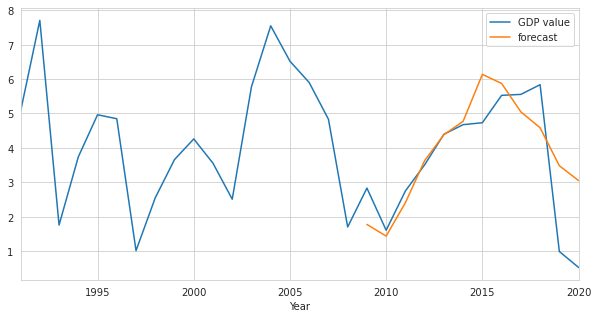

In [56]:
gdp_data['forecast'] = results1.predict(start=18,end=30,dynamic=True)
gdp_data[['GDP value','forecast']].plot(figsize=(10,5))

In [57]:
future_dates1 = [gdp_data.index[-1]+DateOffset(years=x)for x in range(1,10)]

In [58]:
future_dates_df1 = pd.DataFrame(index=future_dates1[1:],columns = gdp_data.columns)

In [59]:
future_dates_df1.tail()

,GDP value,forecast
2025-01-01,NaN,NaN
2026-01-01,NaN,NaN
2027-01-01,NaN,NaN
2028-01-01,NaN,NaN
2029-01-01,NaN,NaN


In [60]:
future_df1 = pd.concat([gdp_data,future_dates_df1])

In [61]:
future_df1.tail()

,GDP value,forecast
2025-01-01,NaN,NaN
2026-01-01,NaN,NaN
2027-01-01,NaN,NaN
2028-01-01,NaN,NaN
2029-01-01,NaN,NaN


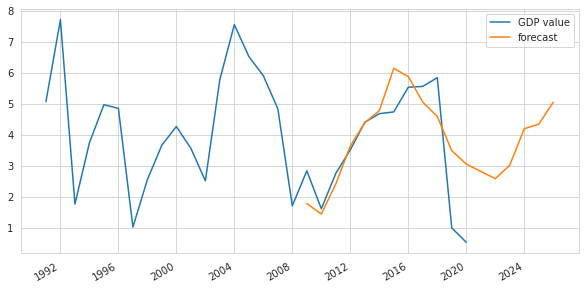

In [62]:
future_df1['forecast'] = results1.predict(start = 18, end = 35, dynamic= True)  
future_df1[['GDP value', 'forecast']].plot(figsize=(10, 5))

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(gdp_data['GDP value'].iloc[:12],gdp_data['forecast'].dropna()))
print(rmse)

2.7459862728122713


In [117]:
model1_ =ARIMA(unemp_data['Unemployment rate'],order=(3,0,0))
results1_ =  model1_.fit()
results1_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      Unemployment rate   No. Observations:                   30
Model:                     ARMA(3, 0)   Log Likelihood                 -21.670
Method:                       css-mle   S.D. of innovations              0.476
Date:                Tue, 16 Nov 2021   AIC                             53.340
Time:                        18:08:28   BIC                             60.346
Sample:                    01-01-1991   HQIC                            55.581
                         - 01-01-2020                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.1986      1.516      1.450      0.147      -0.773       5.170
ar.L1.Unemployment rate     0.7849      0.180      4.354      0.000       0.432       1.138
ar.L2.Unemployment rate     0.3653      0.222      1.642      0.101      -0.071       0.801
ar.L3.Unemployment rate    -0.1849      0.182     -1.016      0.310      -0.542       0.172
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0365           +0.0000j            1.0365            0.0000
AR.2           -1.8625           +0.0000j            1.8625            0.5000
AR.3            2.8010           +0.0000j            2.8010            0.0000
-----------------------------------------------------------------------------
"""

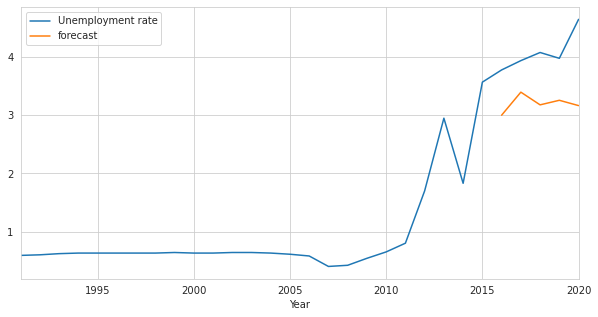

In [118]:
unemp_data['forecast'] = results1_.predict(start=25,end=30,dynamic=True)
unemp_data[['Unemployment rate','forecast']].plot(figsize=(10,5))

In [119]:
future_dates2 = [unemp_data.index[-1]+DateOffset(years=x)for x in range(1,10)]

In [120]:
future_dates_df2 = pd.DataFrame(index=future_dates2[1:],columns = unemp_data.columns)

In [121]:
future_dates_df2.tail()

,Unemployment rate,forecast
2025-01-01,NaN,NaN
2026-01-01,NaN,NaN
2027-01-01,NaN,NaN
2028-01-01,NaN,NaN
2029-01-01,NaN,NaN


In [122]:
future_df2 = pd.concat([unemp_data,future_dates_df2])

In [123]:
future_df2.tail()

,Unemployment rate,forecast
2025-01-01,NaN,NaN
2026-01-01,NaN,NaN
2027-01-01,NaN,NaN
2028-01-01,NaN,NaN
2029-01-01,NaN,NaN


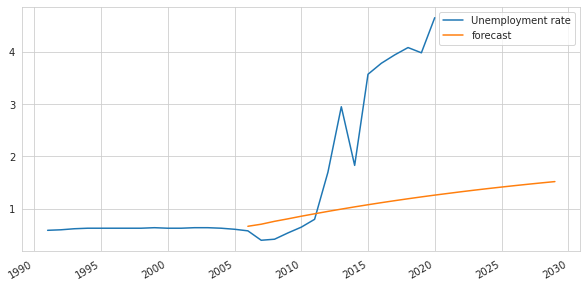

In [126]:
future_df2['forecast'] = results1_.predict(start=15,end=40,dynamic=True)
future_df2[['Unemployment rate','forecast']].plot(figsize=(10,5))

In [127]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(unemp_data['Unemployment rate'].iloc[:5],unemp_data['forecast'].dropna()))
print(rmse)

2.5897020566512987
